  |

##                          Heart Disease Diagnostic Analysis


### Problem Statement:
Health is real wealth in the pandemic time we all realized the brute effects of covid-19 on all irrespective of any status. You are required to analyze this health and medical data for better future preparation.

From the database extract various information such as Heart disease rates, Heart disease by gender, by age.
You can even compare attributes of the data set to extract necessary information.
Make necessary dashboard with the best you can extract from the data.
Use various visualization and features and make the best dashboard.
Find key metrics and factors and show the meaningful relationships between attributes.

#### What is Heart Disease?
Heart disease (or Cardiovascular disease) is a general term for body conditions affecting the heart or blood vessels. It is one of top 10 global causes of deaths in the world and an estimated 17.9 million people died from cardiovascular disease each year, representing 31% of all global deaths.

#### About the dataset
We will use dataset from Kaggle, Heart Disease UCI. This dataset contains 13 attributes related to heart disease such as chest pain types, blood pressure and cholesterol from 303 patients. We will try to explore this dataset to find insights for heart disease. We will explore statistics and relationships with heart disease in this dataset using data visualization.


Importing required libraries

In [1]:
import pandas as pd
import numpy as np
# visualisation libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# To ignore warnings
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats
import plotly.graph_objs as go
import plotly.offline as py

Loading Dataset

In [31]:
data=pd.read_csv('heart.csv')

In [32]:
#checking top 5 rows
data.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0

In [33]:
#checking bottom 5 rows
data.tail()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
1020      2   0     2       1  
1021      1   1     3       0  
1022      1   1     2       0  
1023      2   0     2       1  
1024      1   1     3       0

In [34]:
# shape of the dataset
data.shape

(1025, 14)

observation:
    1)data have 1025 rows
    2)data have 14 columns

In [35]:
#checking datatype of columns
data.info()
print()
print(f'Shape of the dataset')
print(f'Number of Features: {data.shape[1]}')
print(f'Number of Observations: {data.shape[0]}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB

Shape of the dataset
Number of Features: 14
Number of Observations: 1025


# The features following are used for the prediction of heart disease presence:

age:
age in years
    
sex:
0 = Female
1 = Male

cp:
Chest_pain_type: Chest pain types
0 = Typical angina
1 = Atypical angina
2 = Non-angina pain
3 = Asymptomatic

trestbps:
Resting_bp: Resting blood pressure (mmHg)

thalach:
High blood pressure = 140 mmHg or above

chol:
Cholesterol: Serum cholestoral (mg/dL)
Certain elements in the blood, including low-density lipoprotein (LDL), high-density lipoprotein (HDL) and triglycerides
Calculation = HDL + LDL + 0.2 * triglycerides
Higher than 200 mg/dL is concerned

fbs:
Fasting_bs: Fasting blood sugar (> 120 mg/dL)
0 = False
1 = True
Higher than 126 mg/dL points to diabetes

restecg:
Resting_ecg : Resting electrocardiographic results
0 = Normal
1 = Abnormal ST-T wave
2 = Showing probable or definite left ventricular hypertrophy

oldpeak:
Max_heart_rate: Maximum heart rate achieved (bpm)
    
exang:
Exercise_induced_angina: Exercise induced angina
0 = Negative
1 = Positive

slope:
ST_depression: ST depression induced by exercise relative to rest
ST_slope: The slope of the peak exercise ST segment
0 = Upsloping
1 = Horizontal
2 = Downsloping

ca:
Num_major_vessels: Number of major vessels (0-3) colored by fluoroscopy
The colored blood vessels are passing through
There is a clot if the blood vessel is not colored

thal:
Thallium_test: Thallium scintigraphy
3 = Normal
6 = Fixed defect
7 = Reversable defect

target:
Condition: Heart Disease
0 = Benign
1 = Malignant

## Checking Null Value

In [36]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## Observation:
    No null value

In [37]:
# Checking summary of statistics of numeric columns
data.describe()

age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.149268     0.529756   149.114146     0.336585     1.071512   
std       0.356527     0.527878    23.005724     0.472772     1.175053   
min       0.000000     0.000000    71.000000     0.000000     0.000000   
25%       0.000000     0.000000   132.000000     0.000000     0.000000   
50%       0.000000     1.000000   152.000000     0.000000     0.800000   
75%       0.000000     1.000000   166.000000     1.000000     1.800000   
max       1.000000     2.000000   202.000000     1.000000     6.200000   

             slope           ca         thal       target  
count  1025.000000  1025.000000  1025.000000  1025.000000  
mean      1.385366     0.754146     2.323902     0.513171  
std       0.617755     1.030798     0.620660     0.500070  
min       0.000000     0.000000     0.000000     0.000000  
25%       1.000000     0.000000     2.000000     0.000000  
50%       1.000000     0.000000     2.000000     1.000000  
75%       2.000000     1.000000     3.000000     1.000000  
max       2.000000     4.000000     3.000000     1.000000

In [38]:
#checking for unique value in each feature
data.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

## Exploratory Data Analysis

In [41]:
data['sex'].value_counts()

1    713
0    312
Name: sex, dtype: int64

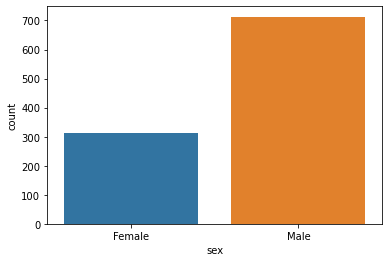

In [42]:
sns.countplot(data=data,x='sex')
plt.xticks([0,1],['Female','Male'])
plt.show()

## Numerical feature

In [43]:
# Numerical feature
numerical_feature=[feature for feature in data.columns if data[feature].dtypes != 'O']
print(numerical_feature)

['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']


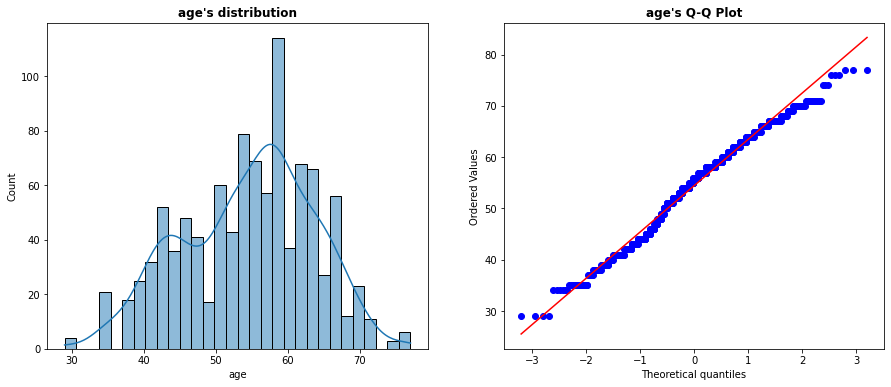

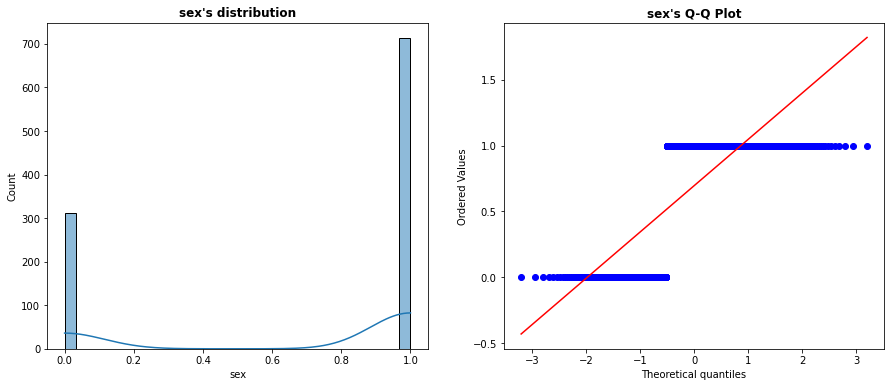

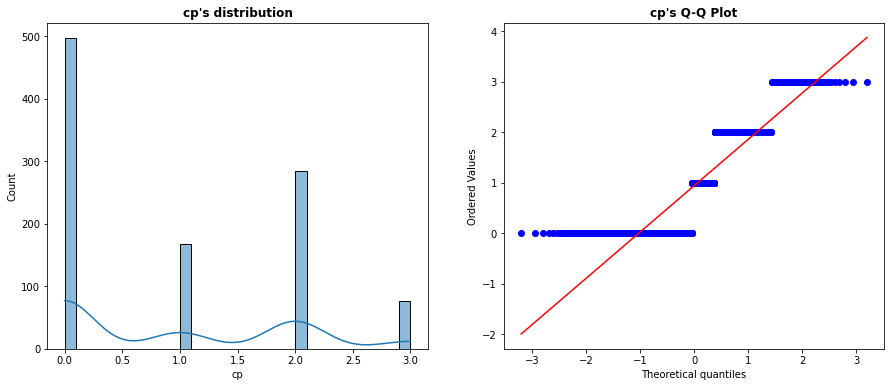

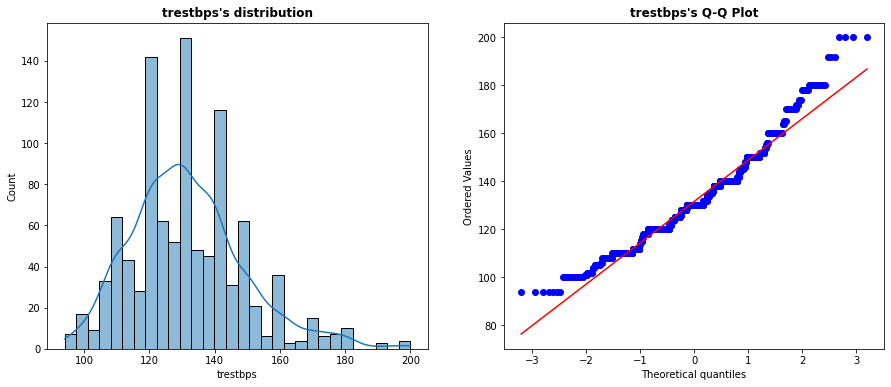

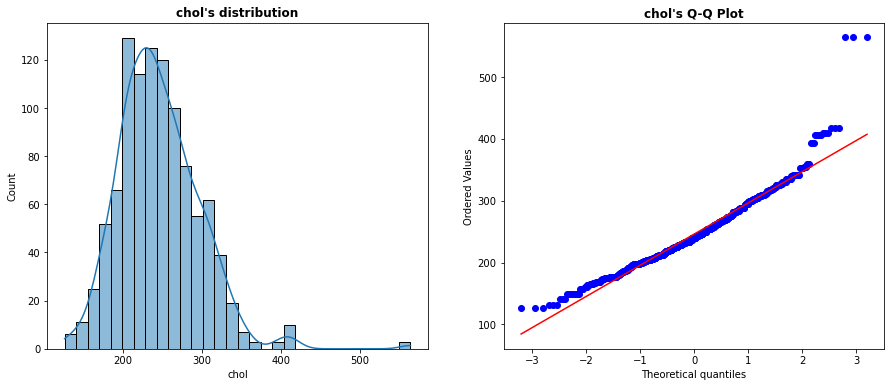

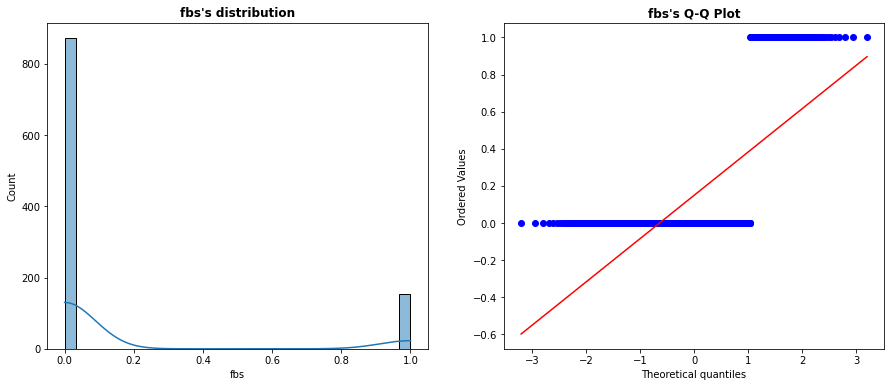

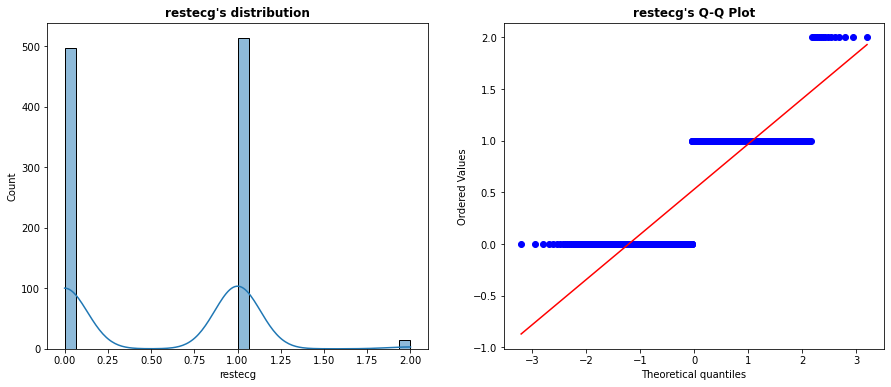

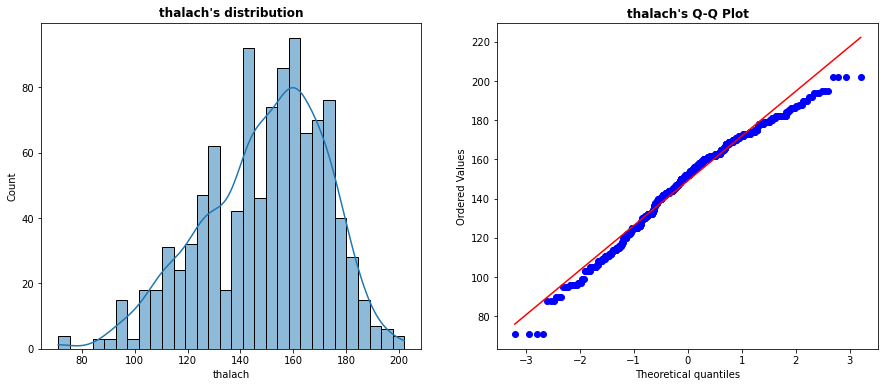

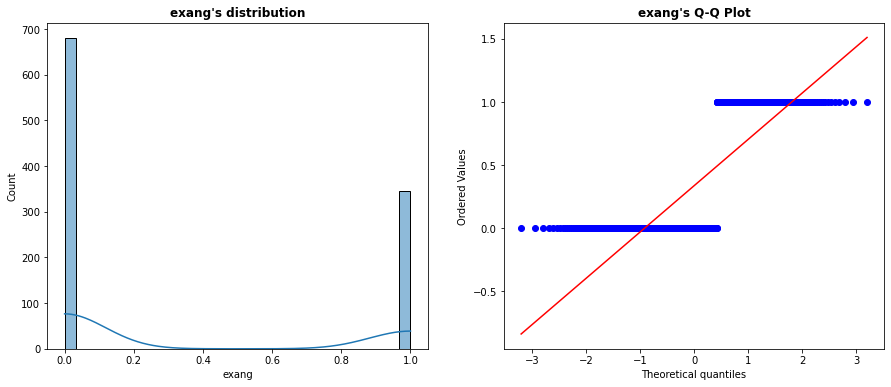

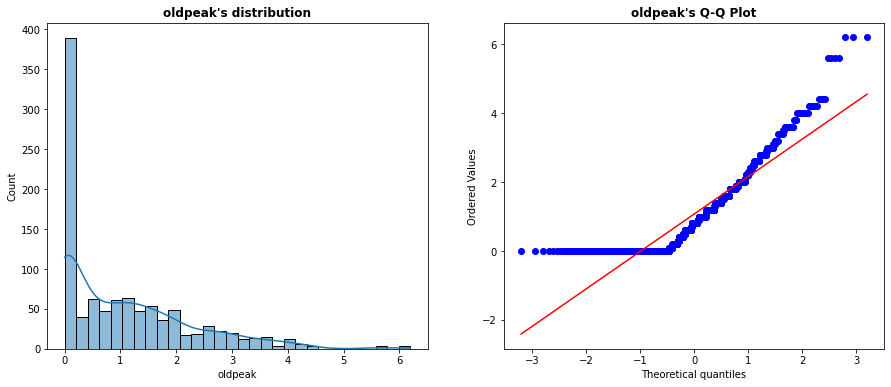

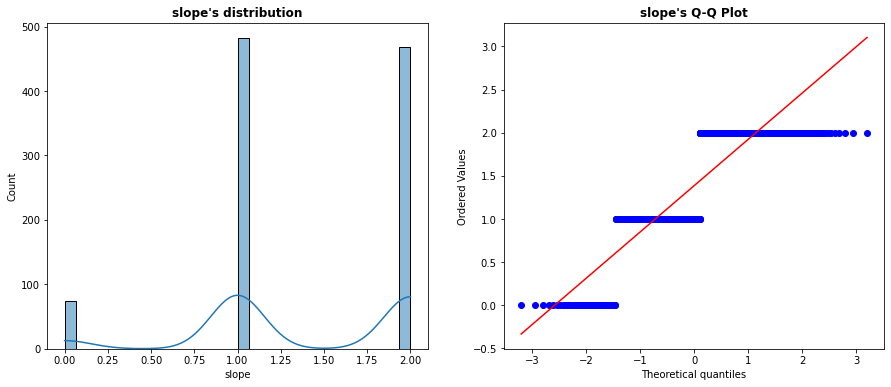

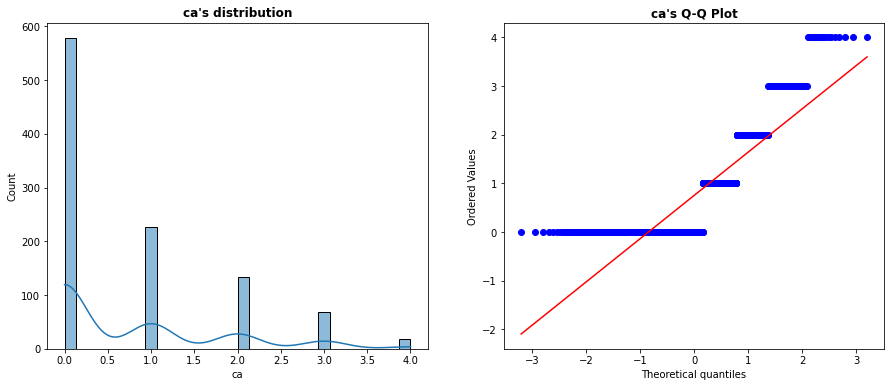

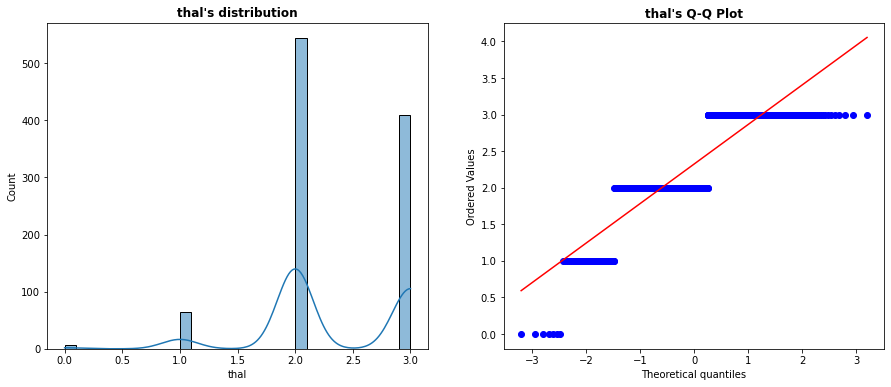

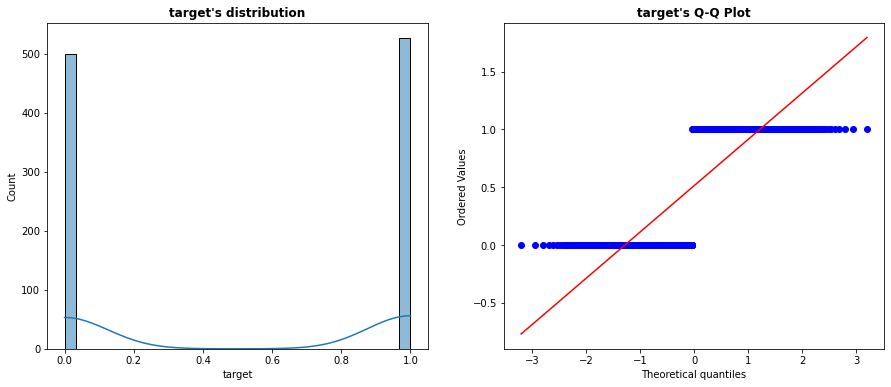

In [44]:
for i in numerical_feature:
    plt.figure(figsize=(15,6))
    plt.subplot(121)
    sns.histplot(data=data, x=i, kde=True, bins=30)
    plt.title("{}'s distribution".format(i),fontweight="bold")
    
    plt.subplot(122)
    stats.probplot(data[i], dist='norm', plot=plt)
    plt.title("{}'s Q-Q Plot".format(i),fontweight="bold")
    plt.show();

OR

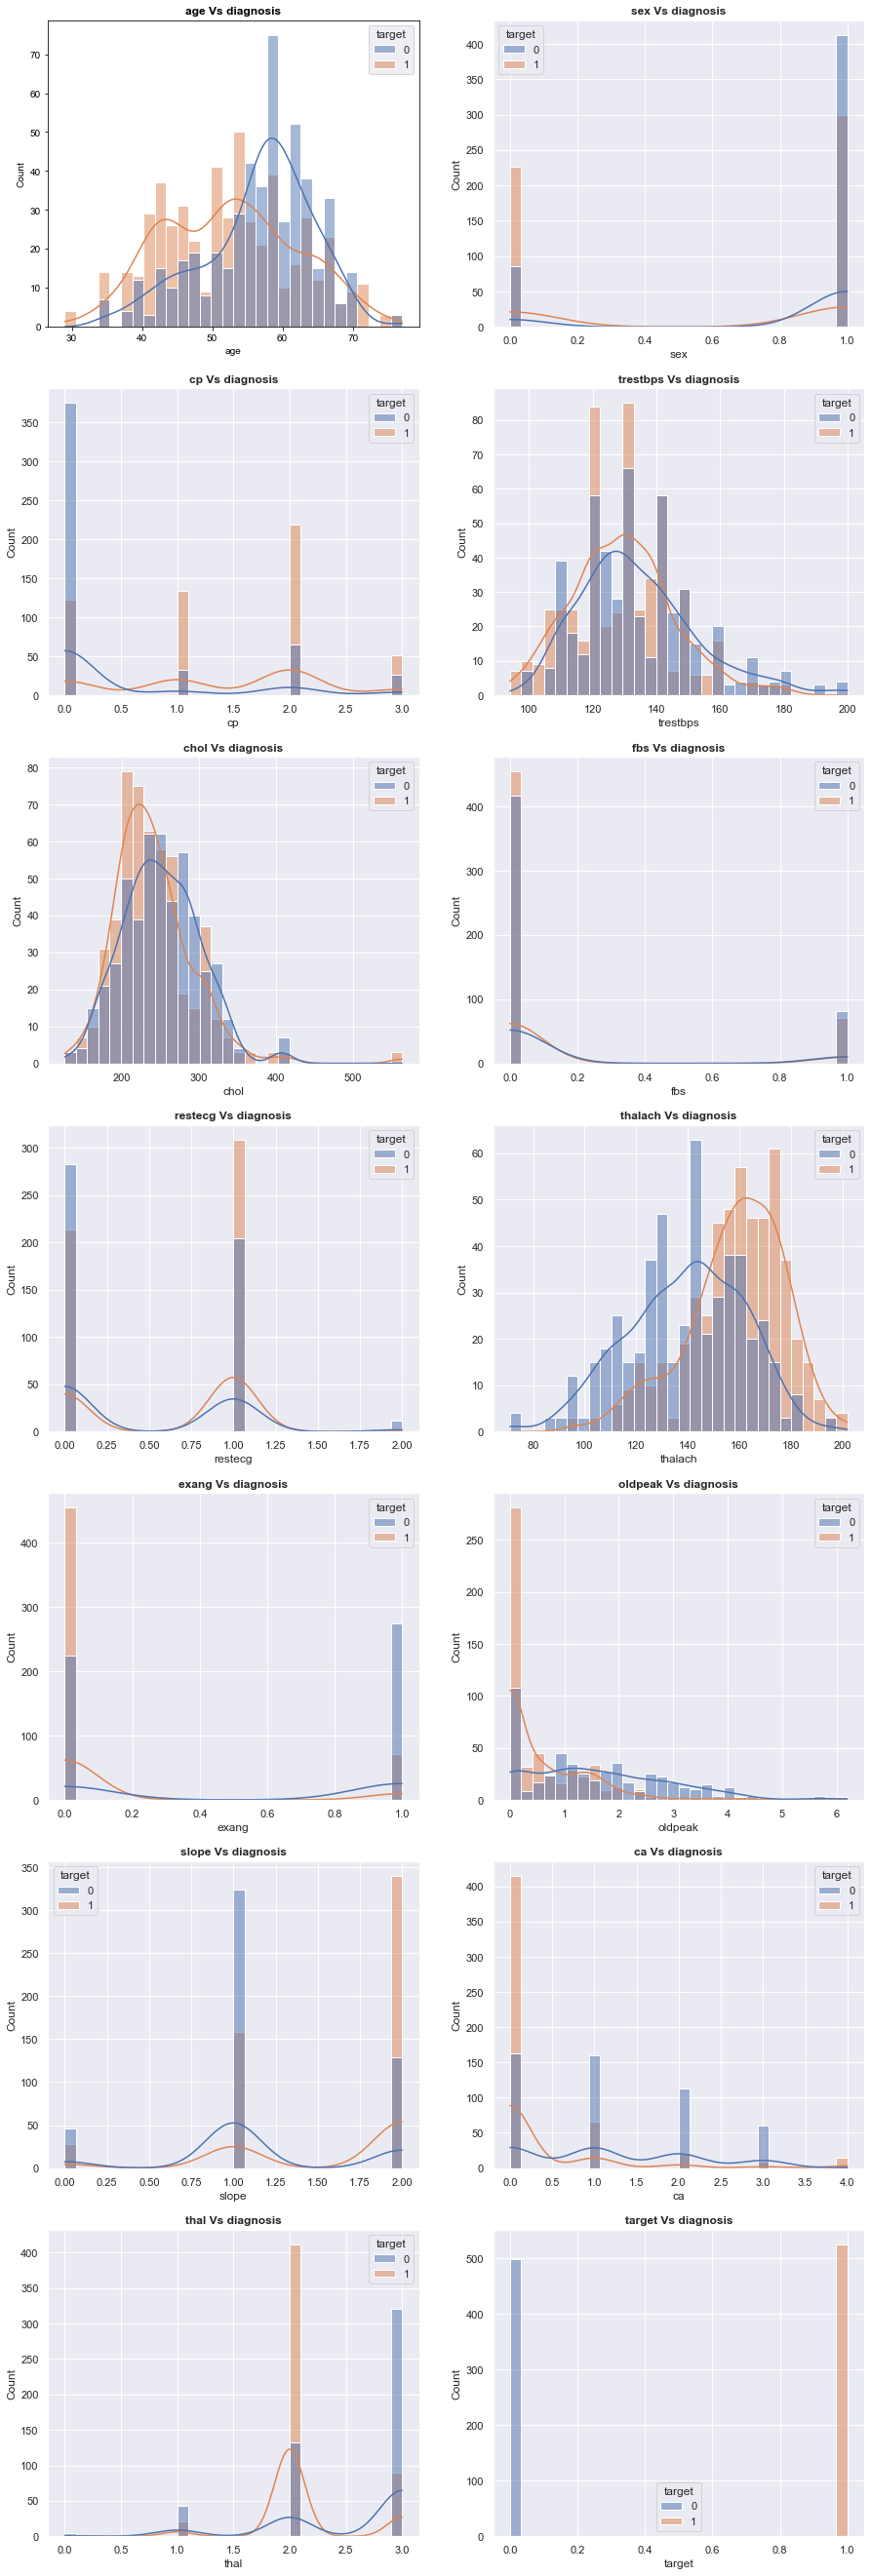

In [45]:
### Comparing Continuous numerical features with Classes

plt.figure(figsize=(15,110))
for i in enumerate(numerical_feature):
    plt.subplot(16, 2, i[0]+1)
    sns.set(rc={'figure.figsize':(7,7)})
    sns.histplot(data=data, x=i[1], kde=True, bins=30, color='blue', hue='target')
    plt.title("{} Vs diagnosis".format(i[1]),fontweight="bold")

In [46]:
#checking correlation of features
data.corr()

age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.103240 -0.071966  0.271121  0.219823  0.121243   
sex      -0.103240  1.000000 -0.041119 -0.078974 -0.198258  0.027200   
cp       -0.071966 -0.041119  1.000000  0.038177 -0.081641  0.079294   
trestbps  0.271121 -0.078974  0.038177  1.000000  0.127977  0.181767   
chol      0.219823 -0.198258 -0.081641  0.127977  1.000000  0.026917   
fbs       0.121243  0.027200  0.079294  0.181767  0.026917  1.000000   
restecg  -0.132696 -0.055117  0.043581 -0.123794 -0.147410 -0.104051   
thalach  -0.390227 -0.049365  0.306839 -0.039264 -0.021772 -0.008866   
exang     0.088163  0.139157 -0.401513  0.061197  0.067382  0.049261   
oldpeak   0.208137  0.084687 -0.174733  0.187434  0.064880  0.010859   
slope    -0.169105 -0.026666  0.131633 -0.120445 -0.014248 -0.061902   
ca        0.271551  0.111729 -0.176206  0.104554  0.074259  0.137156   
thal      0.072297  0.198424 -0.163341  0.059276  0.100244 -0.042177   
target   -0.229324 -0.279501  0.434854 -0.138772 -0.099966 -0.041164   

           restecg   thalach     exang   oldpeak     slope        ca  \
age      -0.132696 -0.390227  0.088163  0.208137 -0.169105  0.271551   
sex      -0.055117 -0.049365  0.139157  0.084687 -0.026666  0.111729   
cp        0.043581  0.306839 -0.401513 -0.174733  0.131633 -0.176206   
trestbps -0.123794 -0.039264  0.061197  0.187434 -0.120445  0.104554   
chol     -0.147410 -0.021772  0.067382  0.064880 -0.014248  0.074259   
fbs      -0.104051 -0.008866  0.049261  0.010859 -0.061902  0.137156   
restecg   1.000000  0.048411 -0.065606 -0.050114  0.086086 -0.078072   
thalach   0.048411  1.000000 -0.380281 -0.349796  0.395308 -0.207888   
exang    -0.065606 -0.380281  1.000000  0.310844 -0.267335  0.107849   
oldpeak  -0.050114 -0.349796  0.310844  1.000000 -0.575189  0.221816   
slope     0.086086  0.395308 -0.267335 -0.575189  1.000000 -0.073440   
ca       -0.078072 -0.207888  0.107849  0.221816 -0.073440  1.000000   
thal     -0.020504 -0.098068  0.197201  0.202672 -0.094090  0.149014   
target    0.134468  0.422895 -0.438029 -0.438441  0.345512 -0.382085   

              thal    target  
age       0.072297 -0.229324  
sex       0.198424 -0.279501  
cp       -0.163341  0.434854  
trestbps  0.059276 -0.138772  
chol      0.100244 -0.099966  
fbs      -0.042177 -0.041164  
restecg  -0.020504  0.134468  
thalach  -0.098068  0.422895  
exang     0.197201 -0.438029  
oldpeak   0.202672 -0.438441  
slope    -0.094090  0.345512  
ca        0.149014 -0.382085  
thal      1.000000 -0.337838  
target   -0.337838  1.000000

<AxesSubplot:>

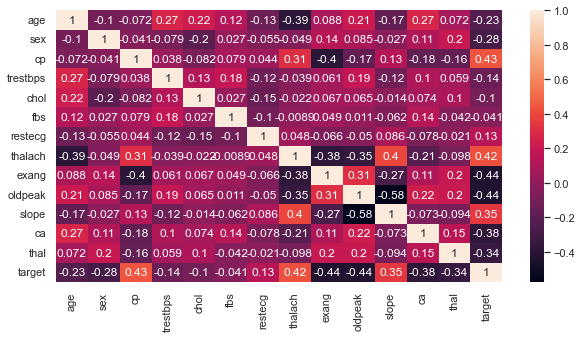

In [47]:
### Plotting heatmap for visualising the correlation between features
sns.set(rc={'figure.figsize':(10,5)})
sns.heatmap(data=data.corr(), annot=True)

In [48]:
results = data['target'].value_counts()
values = [results[0], results[1]]
labels = ['Benign', 'Malignant']
colors = ['MediumSeaGreen', 'Coral']
    
piechart = go.Pie(labels=labels, values=values,
                     marker={'colors': colors, 
                             'line': {'color': 'Black', 'width': 2}})
py.iplot([piechart])



## Observations
Most of tumors are diagnosed with Malignant, 54.5% (165 cases). On the other hand, the proportion of Benign in Condition is less than 50%.

In [49]:
results = data['sex'].value_counts()
values = [results[0], results[1]]
labels = ['Female', 'Male']
colors = ['pink', 'lightblue']
    
piechart = go.Pie(labels=labels, values=values,
                     marker={'colors': colors, 
                             'line': {'color': 'Black', 'width': 2}})
py.iplot([piechart])

## Observations
Male population :69.6%
Female population:30.4%

## Risk Factors for Developing Heart Disease¶


## Risk Factors 1. fbs : Fasting blood suger (over 120 mg/dl)¶


Text(0.5, 0, 'Fasting_bs (0 = False, 1 = True)')

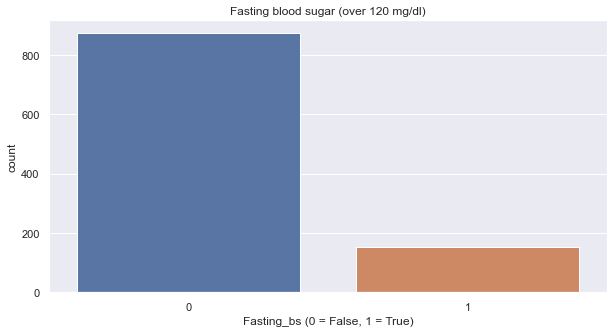

In [50]:
sns.countplot(x='fbs', data=data)
plt.title('Fasting blood sugar (over 120 mg/dl)')
plt.xlabel('Fasting_bs (0 = False, 1 = True)')


Text(0.5, 0, 'Fasting_bs (0 = False, 1 = True)')

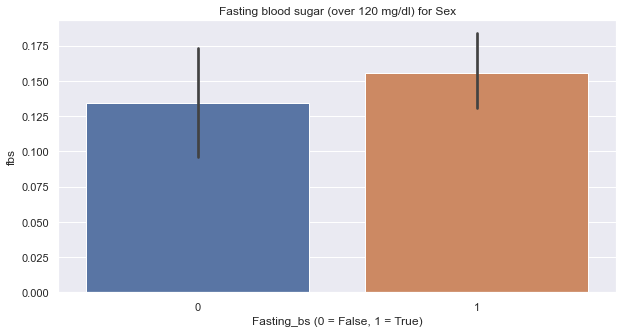

In [51]:
## Fasting blood sugar for Sex
sns.barplot(x='sex',y='fbs', data=data)
plt.title('Fasting blood sugar (over 120 mg/dl) for Sex')
plt.xlabel('Fasting_bs (0 = False, 1 = True)')

## Risk Factors 2. Resting_bp : Resting blood pressure (mmHg)

Text(0.5, 1.0, 'Resting Blood Pressure (mmHg) Distribution')

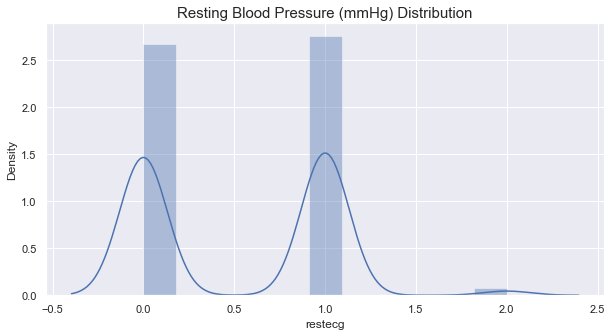

In [52]:
sns.distplot(data['restecg'])
plt.title('Resting Blood Pressure (mmHg) Distribution', fontsize=15)


<AxesSubplot:xlabel='restecg'>

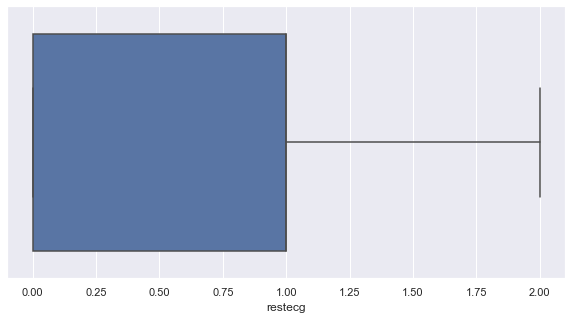

In [53]:
sns.boxplot(data['restecg'])  

Text(0.5, 1.0, 'Serum Cholesterol (mg/dl) Distribution')

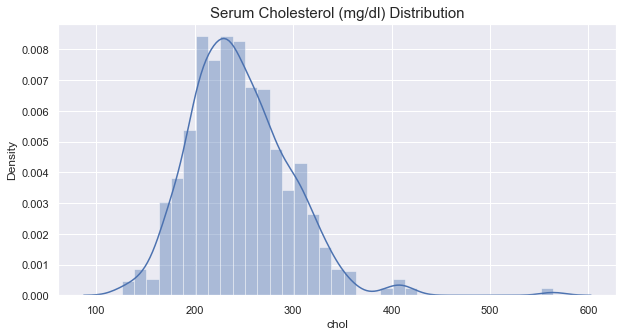

In [54]:
  # Serum cholesterol 
sns.distplot(data['chol'])
plt.title('Serum Cholesterol (mg/dl) Distribution', fontsize=15)

<AxesSubplot:xlabel='chol'>

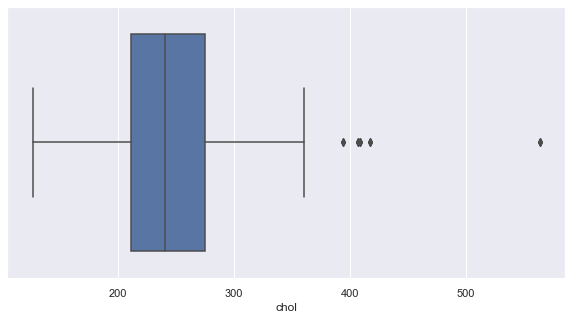

In [55]:
sns.boxplot(data['chol'])  

Text(0.5, 1.0, 'Max Heart Rate Achieved (bpm) Distribution')

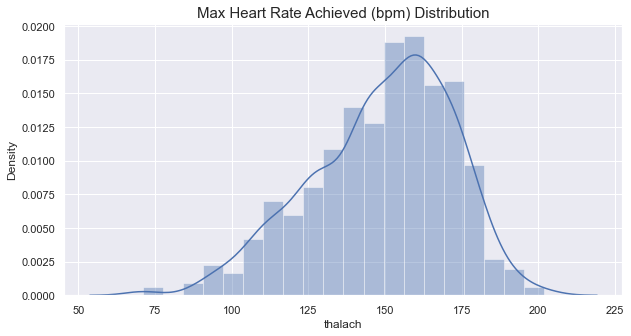

In [56]:
 # Maximum heart rate
sns.distplot(data['thalach'])
plt.title('Max Heart Rate Achieved (bpm) Distribution', fontsize=15)

<AxesSubplot:xlabel='thalach'>

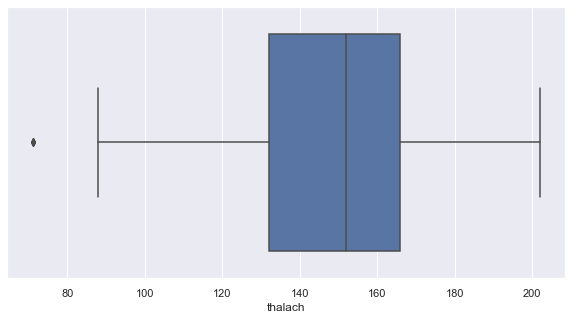

In [57]:
sns.boxplot(data['thalach'])  

# Univariate Analysis

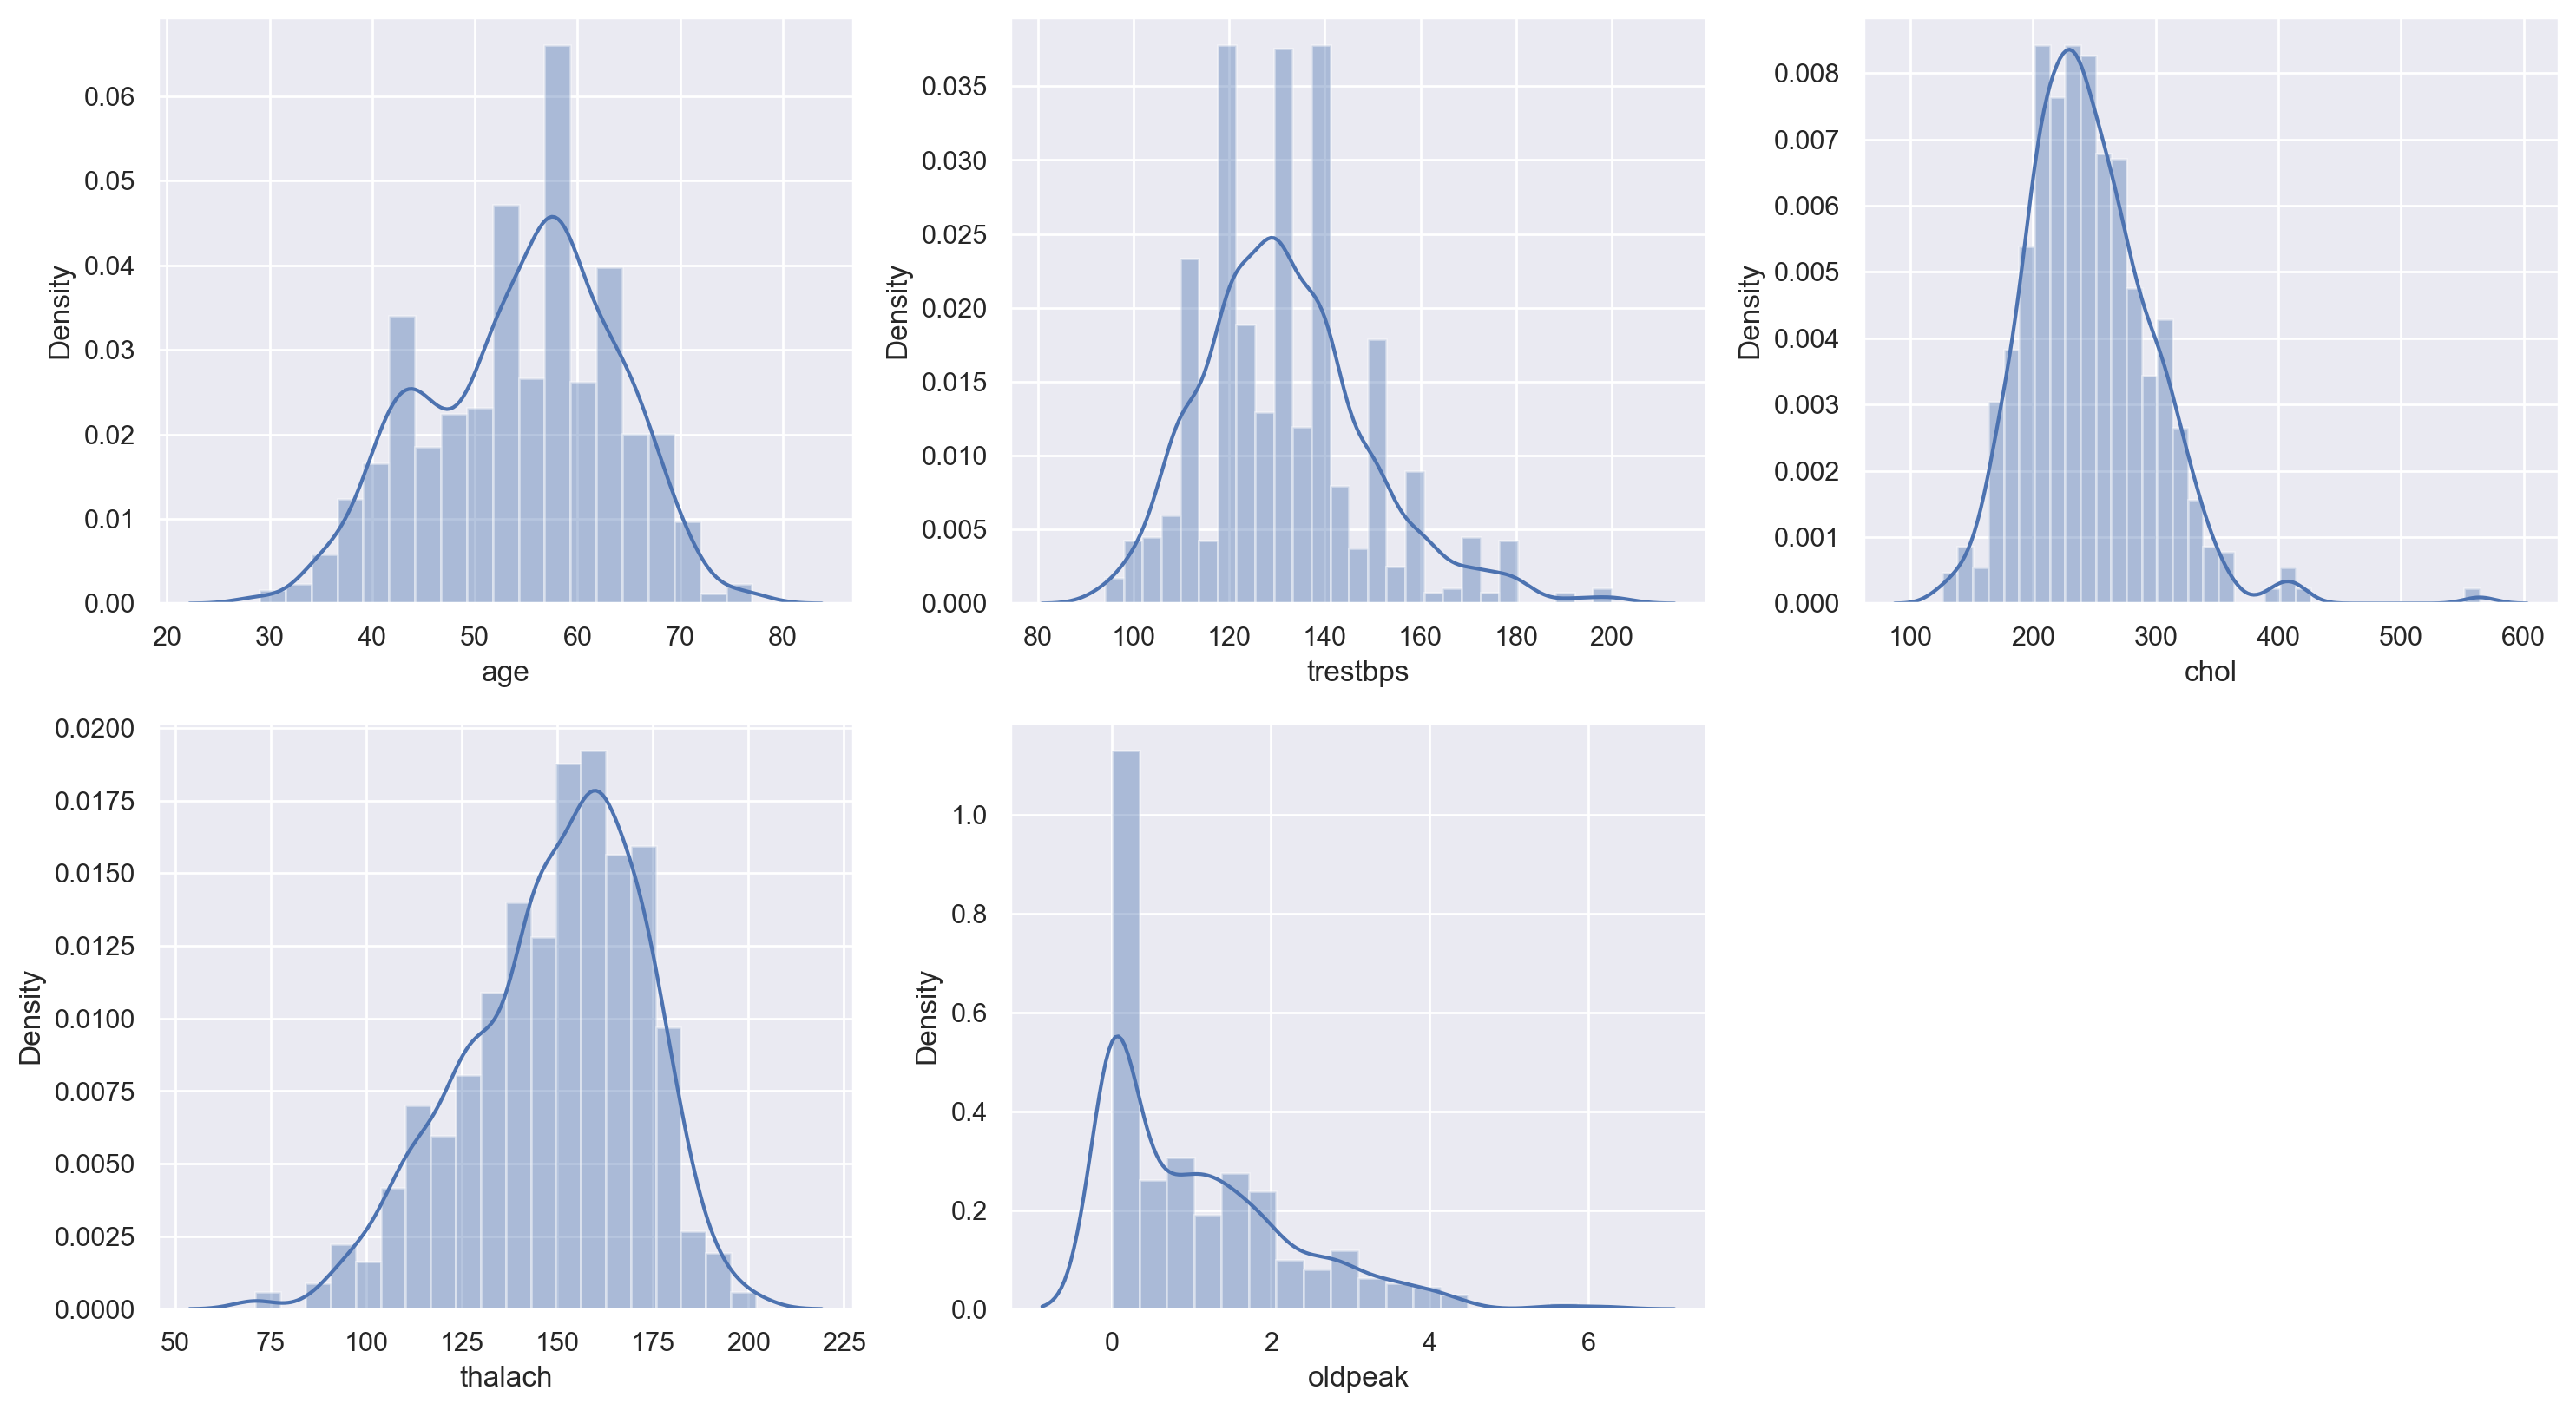

In [66]:
#univariate analysis of numerical features
num_fea=['age','trestbps','chol','thalach','oldpeak']
i=0
plt.figure(figsize=(15,20),dpi=200)
for col in num_fea:
    plt.subplot(5,3,i+1)
    sns.distplot(data[col])
    plt.xlabel(col)
    plt.tight_layout()
    i = i+1

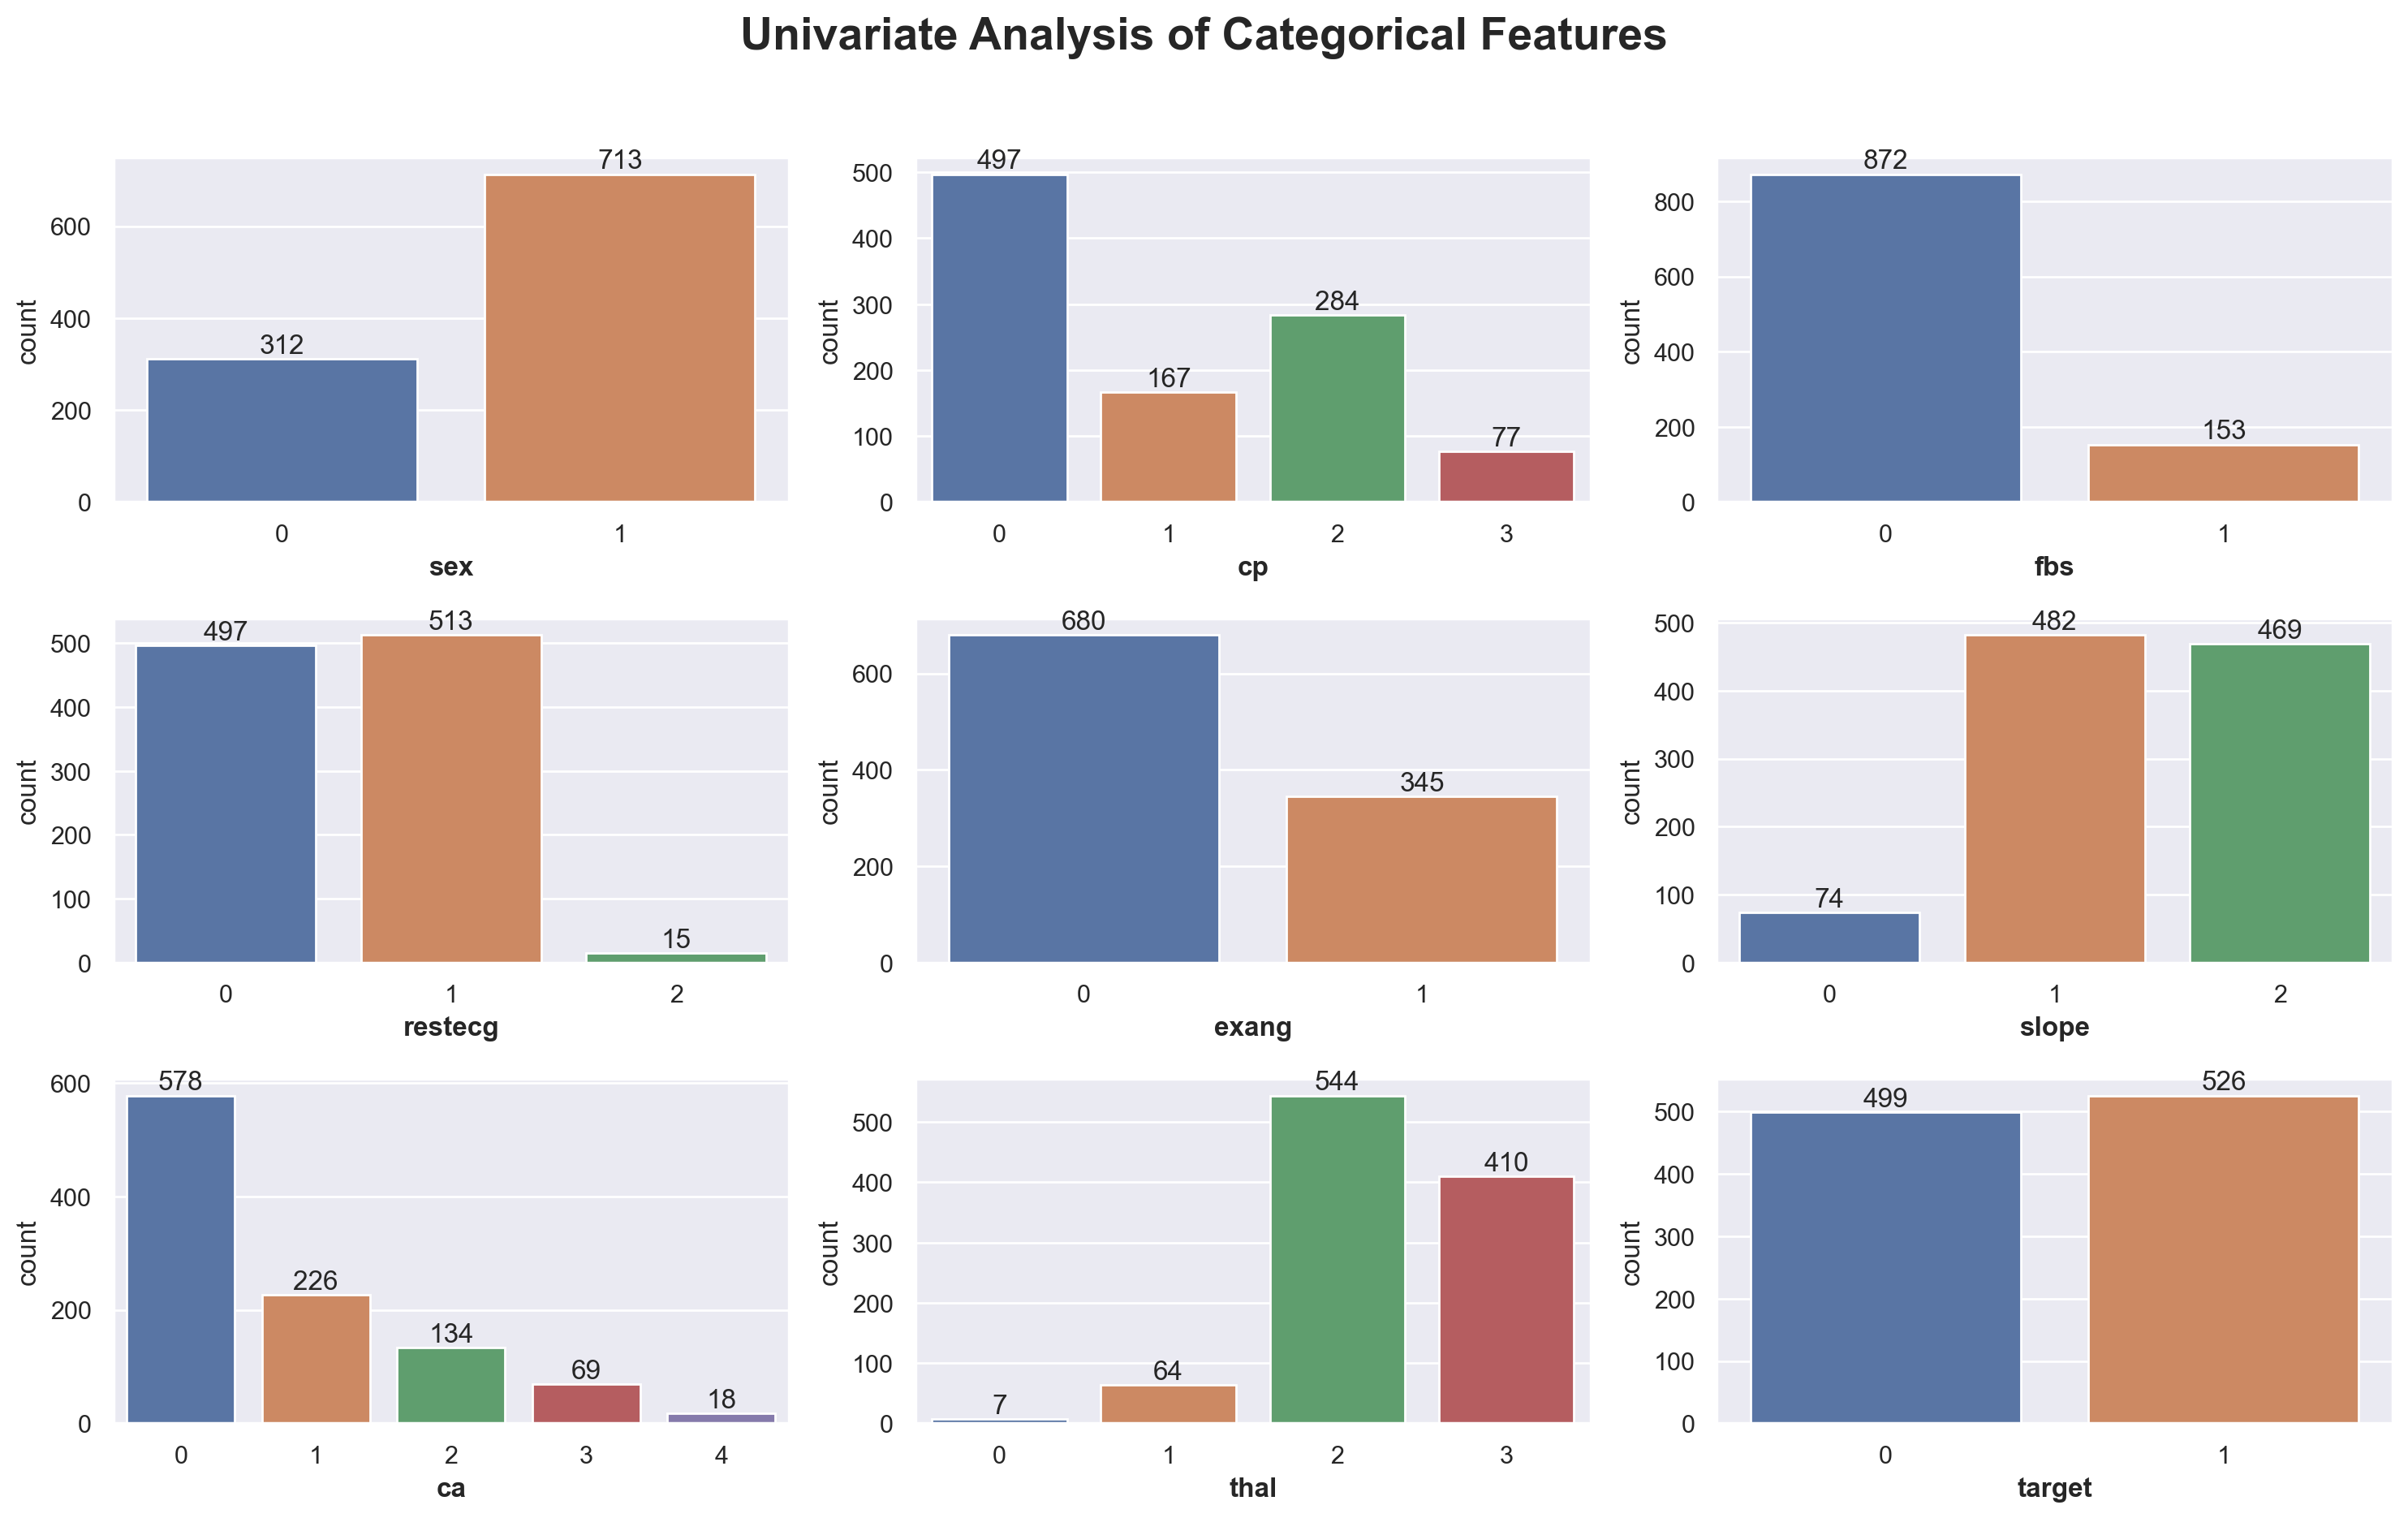

In [62]:
cat_fea=['sex','cp','fbs','restecg','exang','slope','ca','thal','target']
plt.figure(figsize=(15, 20),dpi=200)
plt.suptitle('Univariate Analysis of Categorical Features',fontsize = 20, fontweight = 'bold',alpha = 1, y = 1.01)

i = 0
for col in cat_fea:
    plt.subplot(7,3,i+1)
    ax = sns.countplot(x = col,data=data)
    plt.xlabel(col, fontdict={'fontsize':12,'fontweight':'bold'})
    plt.tight_layout()
    i+=1
    for p in ax.containers:
        ax.bar_label(p,padding=0)

# Bivariate Analysis

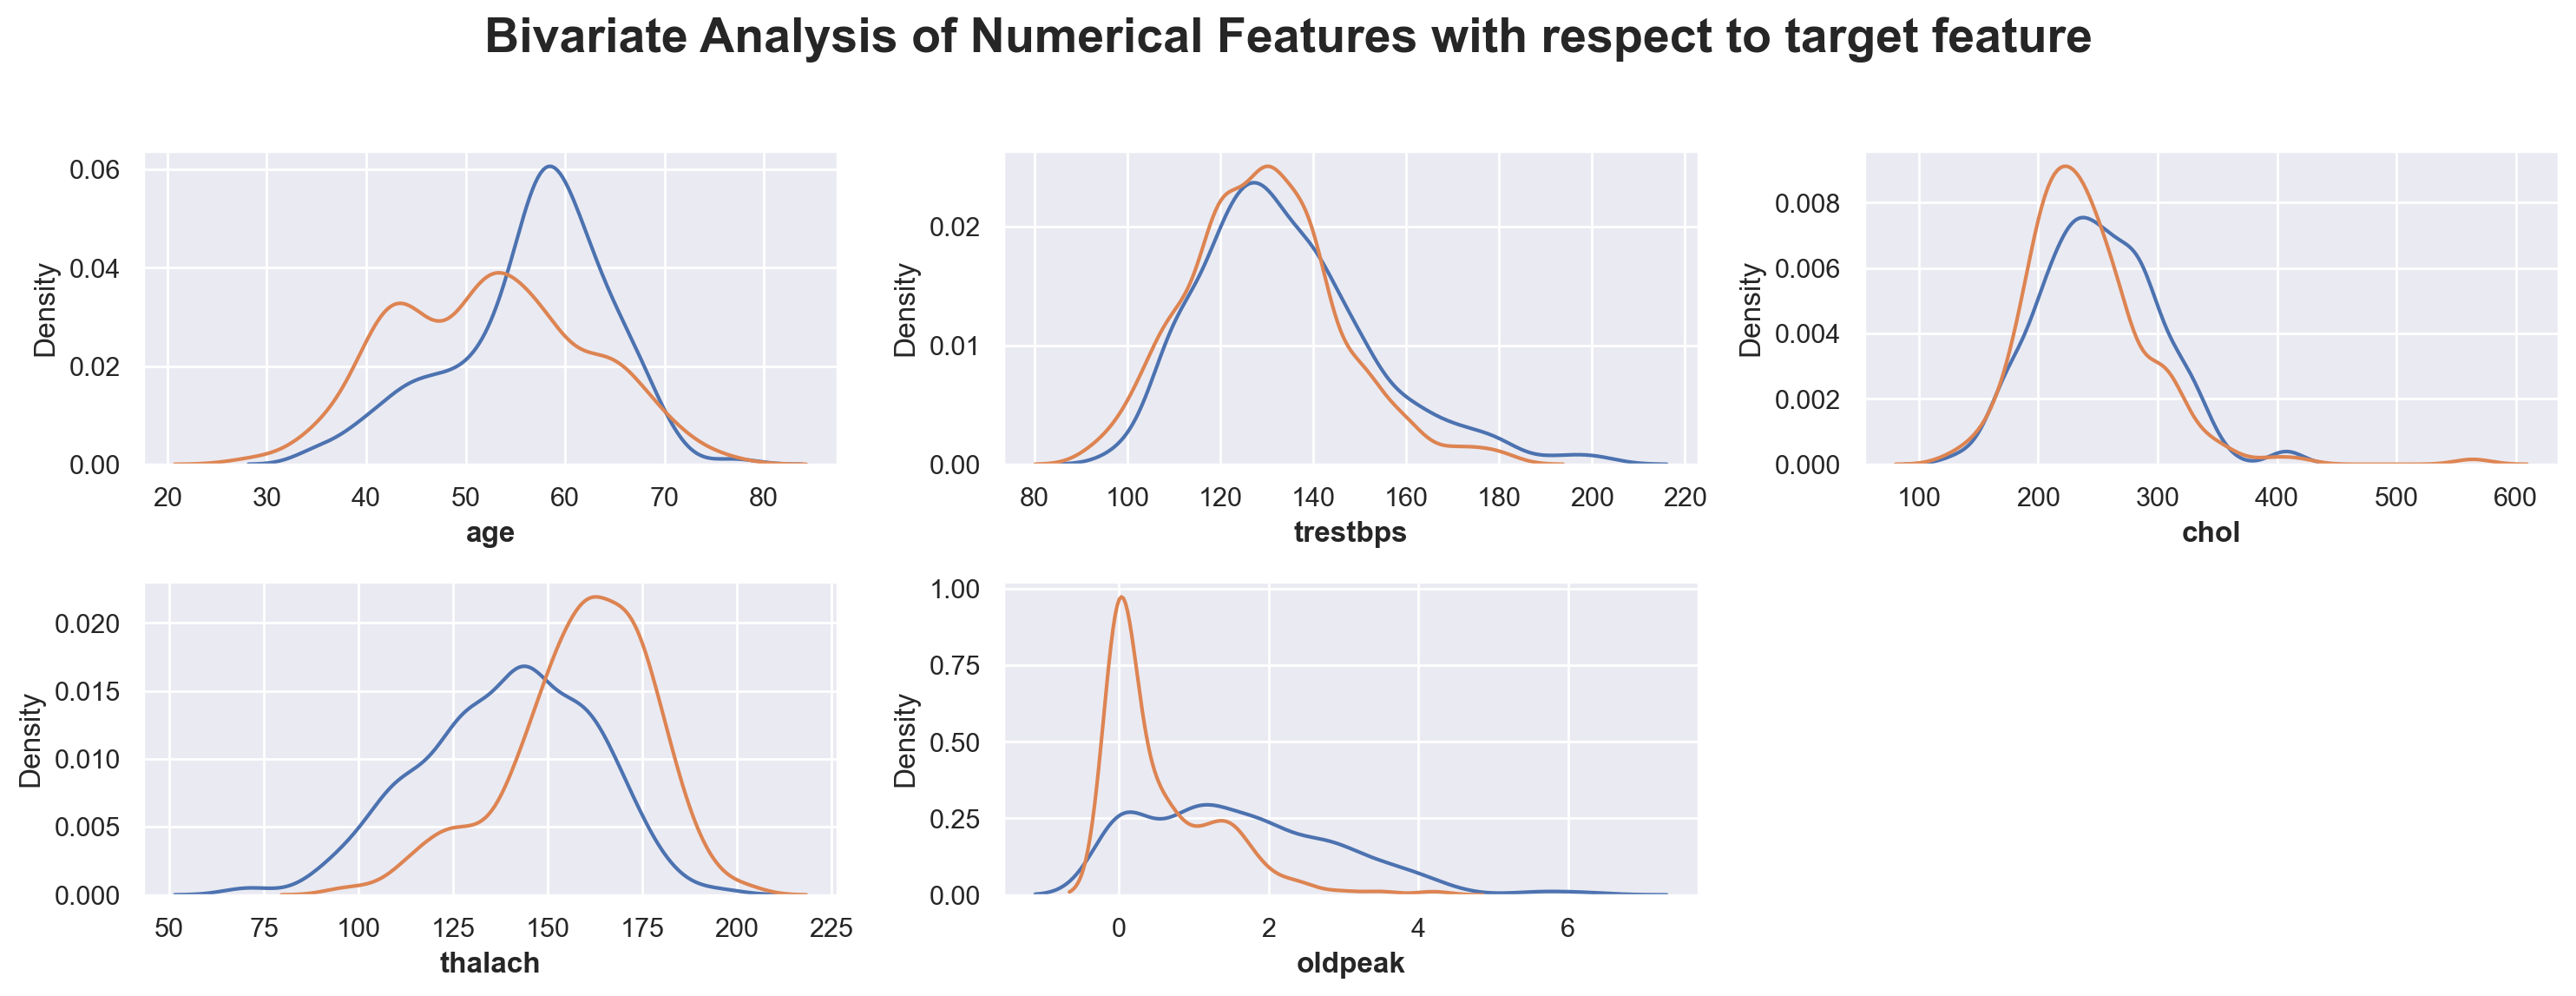

In [65]:
#bivariate analysis of numerical features with respect to target
num_fea=['age','trestbps','chol','thalach','oldpeak']
plt.figure(figsize=(15, 15),dpi=200)
plt.suptitle('Bivariate Analysis of Numerical Features with respect to target feature',fontsize = 20, fontweight = 'bold',alpha = 1, y = 1.01)

i = 0
for col in num_fea:
    plt.subplot(6,3,i+1)
    sns.distplot(data[data['target']==0][col],hist=False)
    sns.distplot(data[data['target']==1][col],hist=False)
    plt.xlabel(col, fontdict={'fontsize':12,'fontweight':'bold'})
    plt.tight_layout()
    i+=1

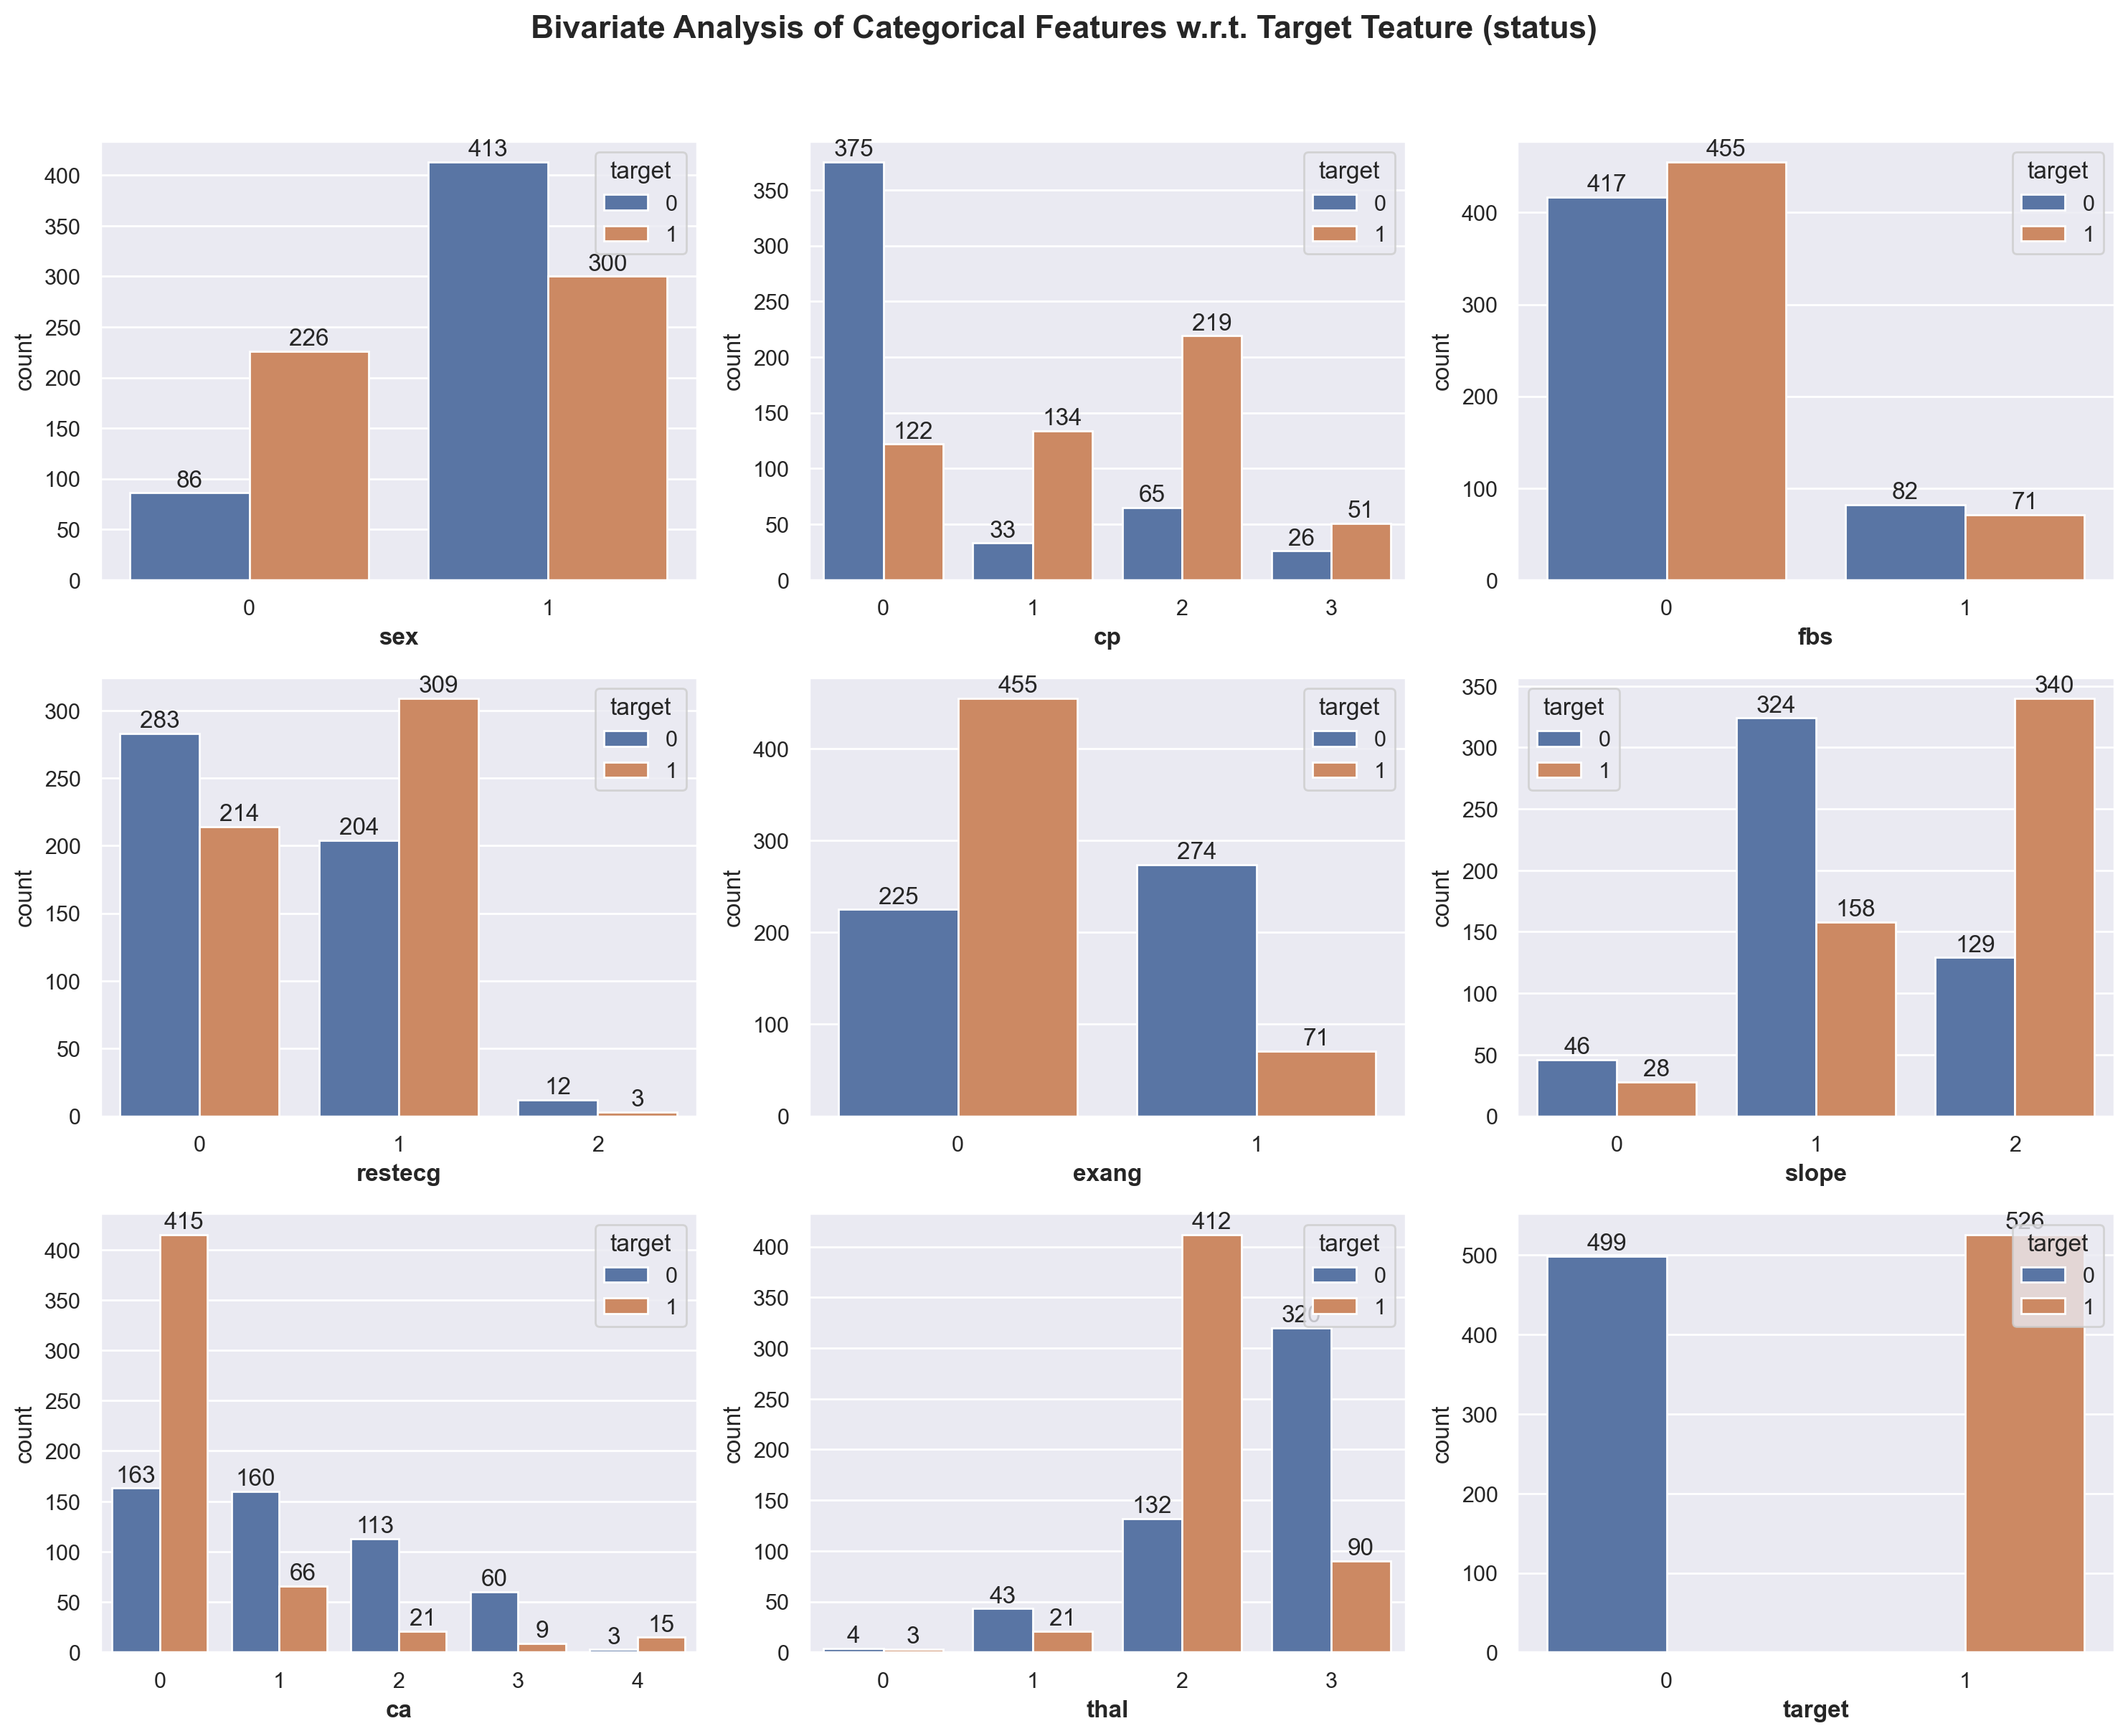

In [67]:
cat_fea=['sex','cp','fbs','restecg','exang','slope','ca','thal','target']
plt.figure(figsize=(15, 30),dpi = 200)
plt.suptitle('Bivariate Analysis of Categorical Features w.r.t. Target Teature (status)',fontsize = 16, fontweight = 'bold',alpha = 1, y = 1.01)

i = 1
for col in cat_fea:
    plt.subplot(8,3,i)
    ax = sns.countplot(x = col, data = data, hue = 'target') 
    plt.xlabel(col, fontdict={'fontsize':12,'fontweight':'bold'})
    plt.tight_layout()
    i+=1
    for p in ax.containers:
        ax.bar_label(p,padding=0.5)
plt.show()

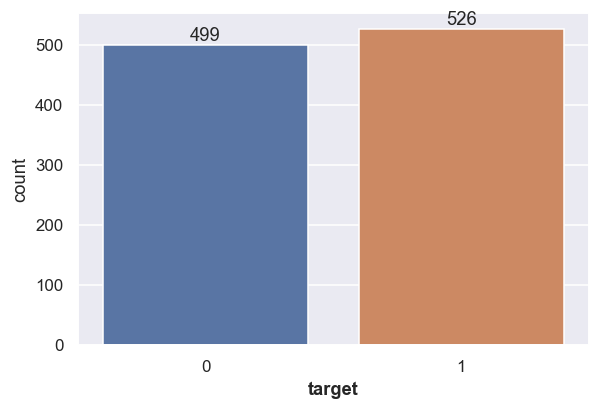

In [72]:
#count of each class in target featurel
plt.figure(figsize=(6, 4),dpi=110)
ax = sns.countplot(x = 'target',data=data)
plt.xlabel('target', fontdict={'fontsize':12,'fontweight':'bold'})
for p in ax.containers:
                ax.bar_label(p,padding=0)

# Outliers

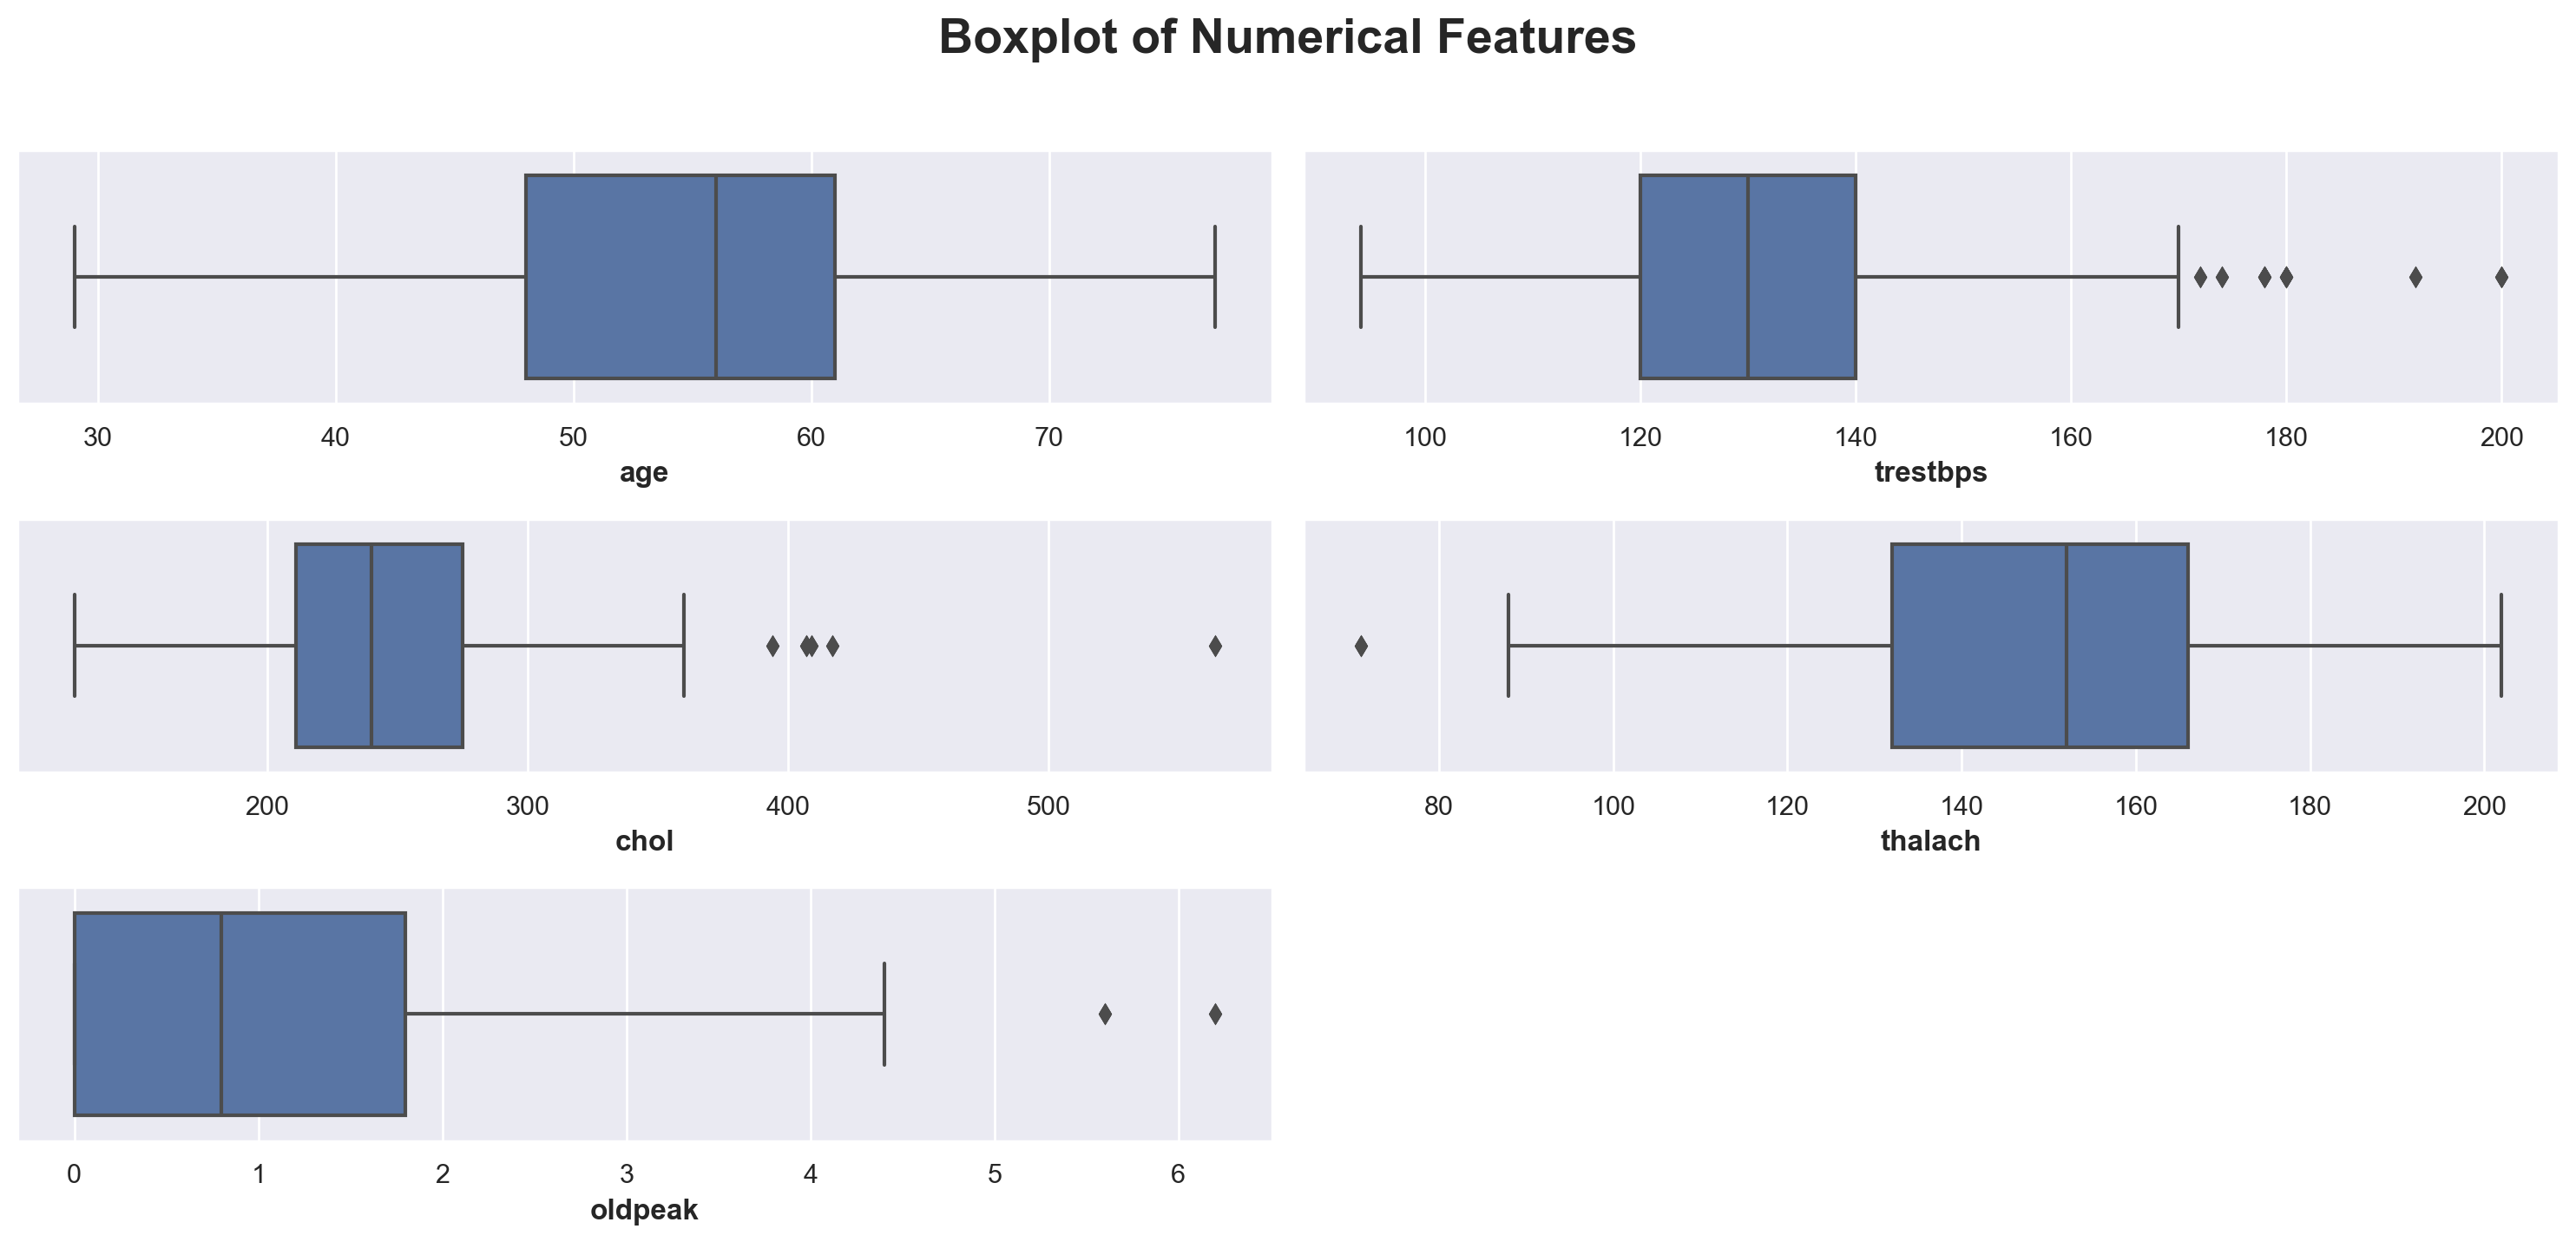

In [71]:
num_fea=['age','trestbps','chol','thalach','oldpeak']
plt.figure(figsize=(15, 15),dpi=200)
plt.suptitle('Boxplot of Numerical Features',fontsize = 20, fontweight = 'bold',alpha = 1, y = 1.01)

i = 0
for col in num_fea:
    plt.subplot(7,2,i+1)
    sns.boxplot(x = data[col])
    plt.xlabel(col, fontdict={'fontsize':12,'fontweight':'bold'})
    plt.tight_layout()
    i+=1

##### Outliers are too less
##### can be removed